### **Mount Google Drive/Parent Directory**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### **Install and Import Libraries**

In [2]:
import os
import cv2
import copy
import pandas as pd
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

from sklearn.metrics import jaccard_score
from sklearn.cluster import KMeans
from numpy.linalg import inv, det, norm
import math
from math import sqrt, pi
from functools import partial

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.functional import Tensor
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset, DataLoader
from torch.nn.modules.activation import ReLU
from torch.nn.modules.batchnorm import BatchNorm2d
import torch.optim as optim

from tqdm import tqdm

**Image Slice Visualization**

In [3]:
# Visualiza 2D Slice from 3D Image
def slice_show(image, slice_no):
    plt.figure()
    plt.axis('off')
    plt.imshow(image[:,:,slice_no].T, cmap='gray')

### **Load Nifti Data**

In [4]:
# Library to read .nii Images
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import nibabel as nib

In [47]:
input_directory = '/content/drive/MyDrive/Colab Notebooks/AtlasLab/par09'
resgistered_directory = input_directory + '/Registered/'
labels_directory = input_directory + '/LabelsTransformed/'

In [48]:
data_list = ['1000', '1001', '1002', '1006', '1007', '1008',
            '1010', '1011', '1012', '1013', '1014',
             '1015', '1017', '1036']

In [49]:
fixed_img_data = nib.load(resgistered_directory + '1009' + '_R.nii')
fixed_img = fixed_img_data.get_fdata()

In [50]:
moving_img_data = nib.load(resgistered_directory + '1001' + '_R.nii')
moving_img = moving_img_data.get_fdata()

In [51]:
fixed_img.shape

(256, 295, 256)

In [52]:
moving_img.shape

(256, 295, 256)

In [53]:
image1 = fixed_img
image2 = moving_img

In [54]:
image1.shape

(256, 295, 256)

In [55]:
image1.shape[0]*image1.shape[1]*image1.shape[2]

19333120

In [56]:

image1 = np.reshape(image1,(image1.shape[0]*image1.shape[1]*image1.shape[2], 1))
image2 = np.reshape(image2,(image2.shape[0]*image2.shape[1]*image2.shape[2], 1))

In [62]:
len(image1)
sum((image1-image2)2))

SyntaxError: ignored

In [57]:
e = sum(pow((image1-image2),2))/len(image1)

In [59]:
print(e)

[20557.8087302]


In [134]:
intensity_atlas_img = np.zeros((fixed_img.shape))
for data in data_list:
  img_data = nib.load(resgistered_directory + data + '_R.nii')
  img = img_data.get_fdata()
  intensity_atlas_img = intensity_atlas_img + img

In [135]:
intensity_atlas_img = intensity_atlas_img / 14
# intensity_atlas_img = intensity_atlas_img.astype(np.uint8)

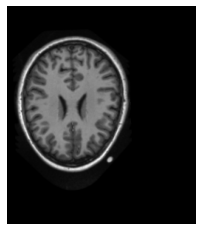

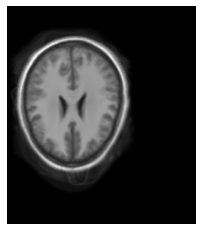

In [136]:
slice_no = 144
slice_show(fixed_img, slice_no)
slice_show(intensity_atlas_img, slice_no)

In [137]:
intensity_atlas_nifti = nib.Nifti1Image(intensity_atlas_img, fixed_img_data.affine, fixed_img_data.header)
nib.save(intensity_atlas_nifti, input_directory + '/intensity_atlas_nifti.nii')

### **Probabilistic Atlas**

In [138]:
fixed_lbl_data = nib.load(labels_directory + '1009' + '_L.nii')
fixed_lbl = fixed_lbl_data.get_fdata()

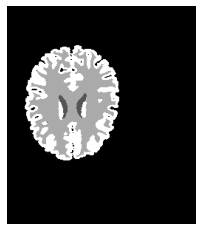

In [139]:
slice_show(fixed_lbl, 144)

In [152]:
sum_csf = np.zeros((fixed_lbl.shape))
sum_gm = np.zeros((fixed_lbl.shape))
sum_wm = np.zeros((fixed_lbl.shape))
for data in data_list:
  img_data = nib.load(labels_directory + data + '_L.nii')
  img = img_data.get_fdata()
  label = img.copy()
  mask_csf = label.copy()
  mask_gm = label.copy()
  mask_wm = label.copy()
  mask_csf[mask_csf != 1] = 0
  mask_gm[mask_gm != 2] = 0
  mask_wm[mask_wm != 3] = 0
  sum_csf = sum_csf + mask_csf
  sum_gm = sum_gm + mask_gm
  sum_wm = sum_wm + mask_wm

In [153]:
probabilistic_atlas_csf = sum_csf / 14
probabilistic_atlas_wm = sum_gm / 14
probabilistic_atlas_gm =  sum_wm /14

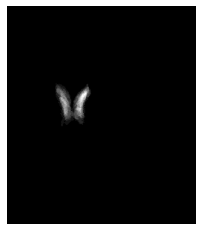

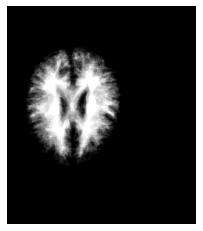

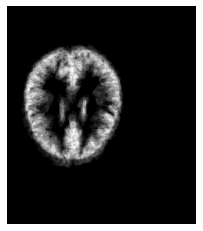

In [154]:
slice_no = 144
slice_show(probabilistic_atlas_csf, slice_no)
slice_show(probabilistic_atlas_wm, slice_no)
slice_show(probabilistic_atlas_gm, slice_no)

In [155]:
probabilistic_atlas_csf_nifti = nib.Nifti1Image(probabilistic_atlas_csf, fixed_img_data.affine, fixed_img_data.header)
nib.save(probabilistic_atlas_csf_nifti, input_directory + '/probabilistic_atlas_csf.nii')
probabilistic_atlas_wm_nifti = nib.Nifti1Image(probabilistic_atlas_wm, fixed_img_data.affine, fixed_img_data.header)
nib.save(probabilistic_atlas_wm_nifti, input_directory + '/probabilistic_atlas_wm.nii')
probabilistic_atlas_gm_nifti = nib.Nifti1Image(probabilistic_atlas_gm, fixed_img_data.affine, fixed_img_data.header)
nib.save(probabilistic_atlas_gm_nifti, input_directory + '/probabilistic_atlas_gm.nii')